# Подготовка модели распознавания рукописных букв и цифр

Вам предстоит самостоятельно обучить модель для задачи распознавания рукописных букв и цифр с помощью датасета `emnist`. Результатом должна быть обученная модель, сохранённая в файл `model.pkl`.

Можете воспользоваться предложенным порядком действий и подсказками из этого ноутбука или подойти к решению задачи самостоятельно и написать всё с нуля. То же касается и процесса упаковки модели в сервис для распознавания самостоятельно написанных символов.

В этом ноутбуке комментариями и символами `...` отмечены места для вашего кода.

Перед отправкой решения убедитесь, что все ячейки ноутбука выполняются последовательно без ошибок, если запустить `Kernel -> Restart & Run All`.

Успехов!

### 1. Установите и импортируйте необходимые библиотеки

In [1]:
!pip install git+https://github.com/hosford42/emnist.git
# your pip installs here

  Cloning https://github.com/hosford42/emnist.git to c:\users\alex\appdata\local\temp\pip-req-build-6nkfbvwh
  Resolved https://github.com/hosford42/emnist.git to commit 1d3981f28e073ca3c15c796f90ab033488ba2f35
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/hosford42/emnist.git 'C:\Users\Alex\AppData\Local\Temp\pip-req-build-6nkfbvwh'


In [1]:
import os
import pickle
import emnist
import random

# your imports here

import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt

### 2. Загрузите датасет и проанализируйте его

Датасет в качестве лейблов (или таргетов) содержит числа от 0 до 46. Каждому числу соответствует ASCII-код некоторого символа. Пары «лейбл — код» хранятся в файле `emnist-balanced-mapping.txt`.
Выведите на экран количество семплов в каждом сплите датасета и размер изображений. Также для каждого лейбла выведите соответствующий ему символ и количество тренировочных семплов, приходящееся на него.
Посмотрите на несколько примеров изображений.

_Подсказка: чтобы получить символ из ASCII-кода, нужно воспользоваться функцией_ `chr()`. _Для вашего удобства можно построить словарь_ (`dict`) _соответствий._

In [3]:
images_train, labels_train = emnist.extract_training_samples('balanced')
images_test, labels_test = emnist.extract_test_samples('balanced')
print(f'Train: {images_train.shape[0]} samples')
print(f'Test: {images_test.shape[0]} samples')
print(f'Image size: {images_train.shape[-2:]}')

Train: 112800 samples
Test: 18800 samples
Image size: (28, 28)


In [9]:
# your code here
# Загрузим файл с парами «лейбл — код» и создадим словарь для построения соответствий лейбла конкретному символу
with open('emnist-balanced-mapping.txt', 'r') as file:
    content = file.read()

lines = content.strip().split('\n')
labels_dict = {int(lines[i].split(' ')[0]): chr(int(lines[i].split(' ')[1])) for i in range(len(lines))}

# Выведем для каждого лейбла соответствующий ему символ и количество тренировочных семплов, приходящееся на него
unique, count = np.unique(labels_train, return_counts=True)
for index, value in labels_dict.items():
    print(f'Символ {value} со значением лейбла {index} имеет {count[index]} тренировочных семплов. (Проверка соответствия значения лейбла номеру словаря {unique[index]})')

Символ 0 со значением лейбла 0 имеет 2400 тренировочных семплов. (Проверка соответствия значения лейбла номеру словаря 0)
Символ 1 со значением лейбла 1 имеет 2400 тренировочных семплов. (Проверка соответствия значения лейбла номеру словаря 1)
Символ 2 со значением лейбла 2 имеет 2400 тренировочных семплов. (Проверка соответствия значения лейбла номеру словаря 2)
Символ 3 со значением лейбла 3 имеет 2400 тренировочных семплов. (Проверка соответствия значения лейбла номеру словаря 3)
Символ 4 со значением лейбла 4 имеет 2400 тренировочных семплов. (Проверка соответствия значения лейбла номеру словаря 4)
Символ 5 со значением лейбла 5 имеет 2400 тренировочных семплов. (Проверка соответствия значения лейбла номеру словаря 5)
Символ 6 со значением лейбла 6 имеет 2400 тренировочных семплов. (Проверка соответствия значения лейбла номеру словаря 6)
Символ 7 со значением лейбла 7 имеет 2400 тренировочных семплов. (Проверка соответствия значения лейбла номеру словаря 7)
Символ 8 со значением ле

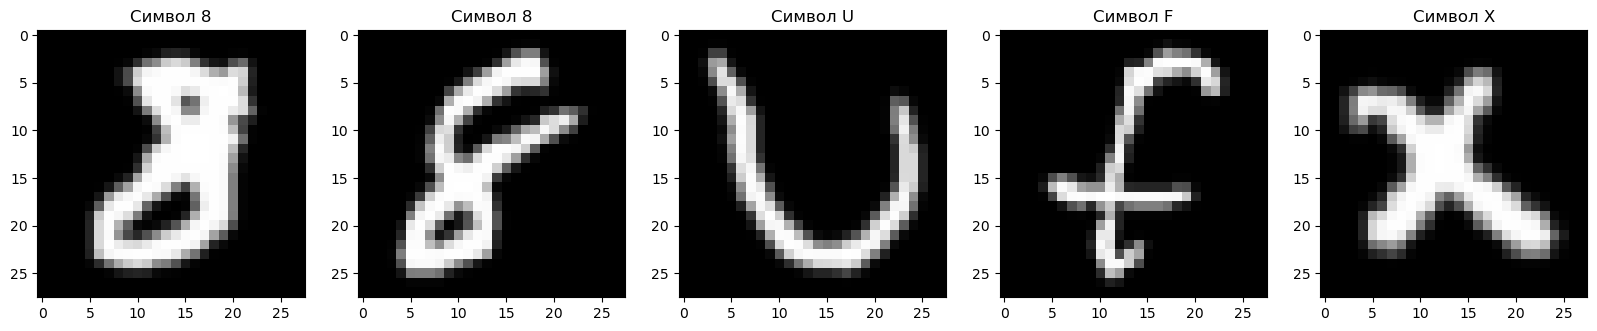

In [11]:
# Выведем 5 случайных изображений и символ, соответствующей лейблу данного изображения
fig, ax = plt.subplots(1, 5, figsize=(20, 12))

rand_numbers = [random.randint(1, 112800) for _ in range(5)]
for i in range(5):
    ax[i].imshow(images_train[rand_numbers[i]], cmap='gray')
    ax[i].set_title(f'Символ {labels_dict[labels_train[rand_numbers[i]]]}')

### 3. Подготовьте датасет для обучения и валидации

_Подсказка: чтобы вытянуть изображения в вектор, понадобится метод_ `reshape` _из библиотеки_ `numpy`.

In [ ]:
X_train = ...
y_train = ...
X_test = ...
y_test = ...

print('Train:', X_train.shape)
print('Test:', X_test.shape)

### 4. Выберите модель, обучите её, протестируйте и сохраните

Выведите на экран точность вашей модели. Выведите и проанализируйте матрицу ошибок. Какие два символа она чаще всего путает? На каком символе модель чаще всего ошибается?

In [ ]:
clf = ...
# your code here

In [ ]:
with open(os.path.join('myapp', 'model.pkl'),'wb') as f:
    pickle.dump(clf, f)